Анализ качества вина с помощью линейной регрессии

1. Загрузка библиотек и данных

In [4]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#Загрузка данных
data = pd.read_csv('winequality-red.csv', sep=';')
print("Первые 5 строк датасета:")
data.head()

Первые 5 строк датасета:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. Предобработка данных

In [8]:
#Проверка на пропуски:
print("Пропуски в данных:")
data.isnull().sum()

Пропуски в данных:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Значения качества вина по 10-балльной шкале находятся в отрезке от 3 до 8

Корреляция признаков с качеством вина:


<Axes: >

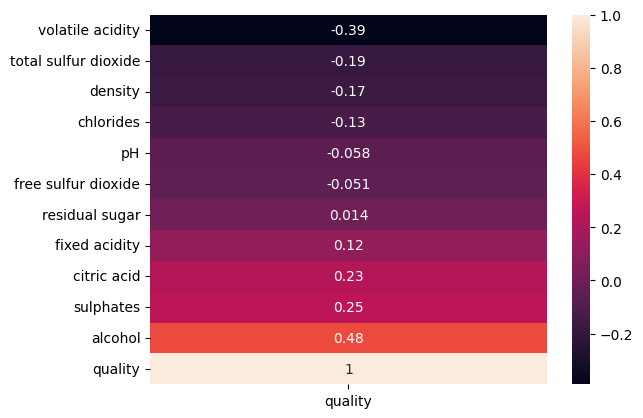

In [37]:
#График корреляций всех признаков с качеством(целевой переменной quality)
corr = data.corr()
print("Корреляция признаков с качеством вина:")
sns.heatmap(data.corr()[['quality']].sort_values('quality'), annot=True)

In [72]:
#Выбираем наиболее значимые признаки
features = ['alcohol' , 'sulphates' , 'citric acid' , 'volatile acidity', 'total sulfur dioxide','pH']
X = data[features]
Y = data['quality']

Выбор pH обоснован химией вина, и улучшением метрик

3. Обучение модели

In [73]:
#Разделение данных на обучающие и тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Создание модели линейной регрессии и обучение
model = LinearRegression()
model.fit(X_train, Y_train)
#Предсказание на тестовых данных
Y_pred = model.predict(X_test)

4. Оценка модели

In [74]:
#Метрики
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 0.39
R^2: 0.40


In [75]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean").fit(X_train, Y_train)
Y_dummy = dummy.predict(X_test)
dummy_mse = mean_squared_error(Y_test, Y_dummy)
print(f"MSE базовой модели (среднее значение): {dummy_mse:.2f}")

MSE базовой модели (среднее значение): 0.66


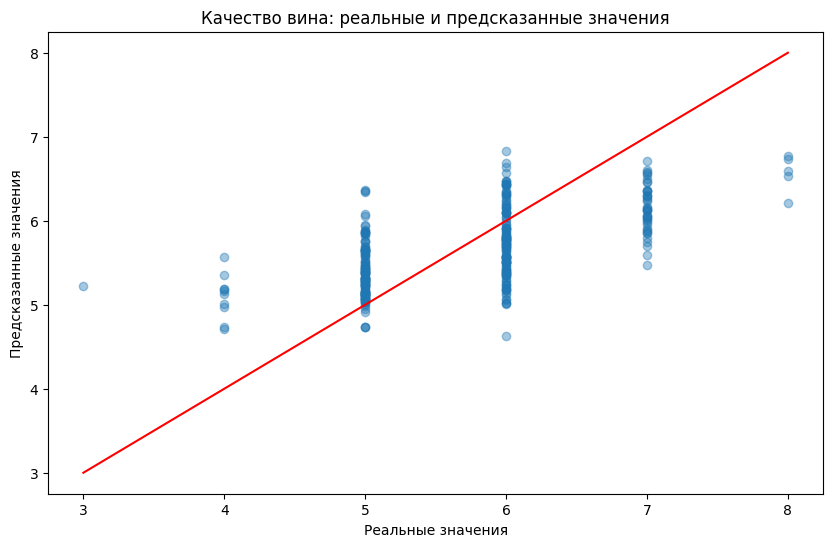

In [84]:
#График предсказаний и реальных значений
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.4)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Качество вина: реальные и предсказанные значения")
plt.plot([3, 8], [3, 8], color='red')  #Идеальный результат
plt.show()

5. Интерпритация коэффицентов

In [85]:
#Таблица коэффициентов
coefficients = pd.DataFrame({
    'Признак': features,
    'Коэффициент': model.coef_
})
print("Влияние признаков на качество вина:")
coefficients

Влияние признаков на качество вина:


,Признак,Коэффициент
0,alcohol,0.311703
1,sulphates,0.638251
2,citric acid,-0.224859
3,volatile acidity,-1.167727
4,total sulfur dioxide,-0.002378
5,pH,-0.440142


#### Выводы:
- Алкоголь и сульфаты положительно влияют на оценку
- Кислотность и pH снижают оценку
- Модель объясняет ~40% дисперсии(R^2=0.40)
- Предсказание по сравнению с базовой моделью (среднее значение) улучшено на 40.9% (MSE = 0.39 , MSE базовой модели = 0.66)

In [86]:
#Данные нового вина (значения в том же порядке, что и в X_train)
new_wine = {
    'alcohol': [12.5],
    'sulphates': [0.66],
    'citric acid': [0.03],
    'volatile acidity': [0.4],
    'total sulfur dioxide': [46.0],
    'pH': [3.2],
}
#Преобразуем в DataFrame
new_data = pd.DataFrame(new_wine)
predicted_quality = model.predict(new_data)
print(f"Предсказанное качество вина: {predicted_quality[0]:.1f} из 10")

Предсказанное качество вина: 6.5 из 10
